In [1]:
#!/usr/bin/env python
# coding: utf-8

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os


from helpers.synthesis_plots import *
from helpers.scatterplot_visualizers import *

plt.style.use("science.mplstyle")

dpi = 800

In [2]:
scatterplot_dir = "/global/ml4hep/spss/rrmastandrea/synth_SM_AD/NF_results_wide/"


n_seed = 1

num_bkg = 320000
num_sig = 20000

## Visualize the scatterplots 

First run ```run_scatterplot.py```

In [3]:
num_signal_to_inject = 1000


process = "StandardScale"

synth_ids = ["feta", "cathode", "curtains"]#, "salad", "full_sup"]#, "combined"]
all_results_bkg, all_results_sig = load_in_data(num_signal_to_inject, num_bkg, process, synth_ids, n_seed, scatterplot_dir)




## Plot samples against each other for all random seeds

In [4]:
concatenated_results_bkg, concatenated_results_sig = concatenate_scatterplot_data(all_results_bkg, all_results_sig, synth_ids, n_seed)




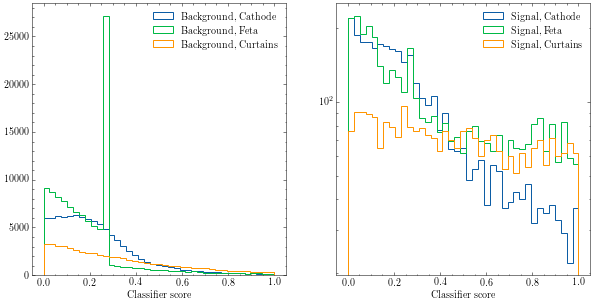

In [6]:
# Make sure that the first half is background, second half is signal

bins = np.linspace(0, 1, 40)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))


#ax[0].hist(concatenated_results_bkg["full_sup"], bins = bins, histtype = "step", label = "Background, Full. Sup.")
#ax[1].hist(concatenated_results_sig["full_sup"], bins = bins, histtype = "step", label = "Signal, Full. Sup.")

ax[0].hist(concatenated_results_bkg["cathode"], bins = bins, histtype = "step", label = "Background, Cathode")
ax[1].hist(concatenated_results_sig["cathode"], bins = bins, histtype = "step", label = "Signal, Cathode")

ax[0].hist(concatenated_results_bkg["feta"], bins = bins, histtype = "step", label = "Background, Feta")
ax[1].hist(concatenated_results_sig["feta"], bins = bins, histtype = "step", label = "Signal, Feta")


ax[0].hist(concatenated_results_bkg["curtains"], bins = bins, histtype = "step", label = "Background, Curtains")
ax[1].hist(concatenated_results_sig["curtains"], bins = bins, histtype = "step", label = "Signal, Curtains")


#ax[0].hist(concatenated_results_bkg["salad"], bins = bins, histtype = "step", label = "Background, Salad")
#ax[1].hist(concatenated_results_sig["salad"], bins = bins, histtype = "step", label = "Signal, Salad")

ax[1].set_yscale("log")


ax[0].set_xlabel("Classifier score")
ax[1].set_xlabel("Classifier score")

ax[0].legend()
ax[1].legend()


plt.show()


In [7]:
import matplotlib.colors as colors

def make_plot(bkg_x, bkg_y, sig_x, sig_y, label_x, label_y, num_bins = 100, plot_lims = 5, vmax = 5e3):
    
    # plot params
    b = np.linspace(-plot_lims, plot_lims, num_bins)
    cmap = "rainbow"
    fontsize = 30
    small_font = 20


    fig, ax = plt.subplots(1, 2, figsize = (16, 8))

    img_bkg = ax[0].hist2d(bkg_x.flatten(), bkg_y.flatten(), bins = b, norm=colors.LogNorm(vmin=1e0, vmax=vmax), cmap = cmap, density = False)
    ax[0].plot([-plot_lims, plot_lims], [-plot_lims, plot_lims], color = "black")
    ax[0].set_xlabel(label_x, fontsize = fontsize)
    ax[0].set_ylabel(label_y, fontsize = fontsize)
    ax[0].set_title("Background", fontsize = fontsize)
    ax[0].set_aspect(1)
    ax[0].text(-3, 4, f"$n_\\mathrm{{sig}}$ = {num_signal_to_inject}", fontsize = fontsize)
    ax[0].tick_params(axis='both', which='major', labelsize=small_font)
    

    img_sig = ax[1].hist2d(sig_x.flatten(), sig_y.flatten(), bins = b, norm=colors.LogNorm(vmin=1e0, vmax=vmax), cmap = cmap, density = False)
    ax[1].plot([-plot_lims, plot_lims], [-plot_lims, plot_lims], color = "black")
    ax[1].set_xlabel(label_x, fontsize = fontsize)
    ax[1].set_ylabel(label_y, fontsize = fontsize)
    ax[1].set_title("Signal", fontsize = fontsize)
    ax[1].set_aspect(1)
    ax[1].text(-3, 4, f"$n_\\mathrm{{sig}}$ = {num_signal_to_inject}", fontsize = fontsize)
    ax[1].tick_params(axis='both', which='major', labelsize=small_font)
    
    cb_ax = fig.add_axes([.92,.2,.02,.6])
    cbar = fig.colorbar(img_sig[3],orientation='vertical',cax=cb_ax)


    cbar.ax.tick_params(labelsize=small_font, rotation = 270) 
    cbar.set_label("Counts", fontsize = small_font, rotation = 270, labelpad = 20)

    plt.show()
    return fig


In [12]:

dim = len(synth_ids)

#params for all plots
num_bins = 60
lower_plot_lim, upper_plot_lim = -15, 15
vmax = 5e3
b = np.linspace(lower_plot_lim, upper_plot_lim, num_bins)
cmap = "rainbow"
fontsize = 25
small_font = 20


nice_labels = ["FETA", "CATHODE", "CURTAINs"]



## Background 

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


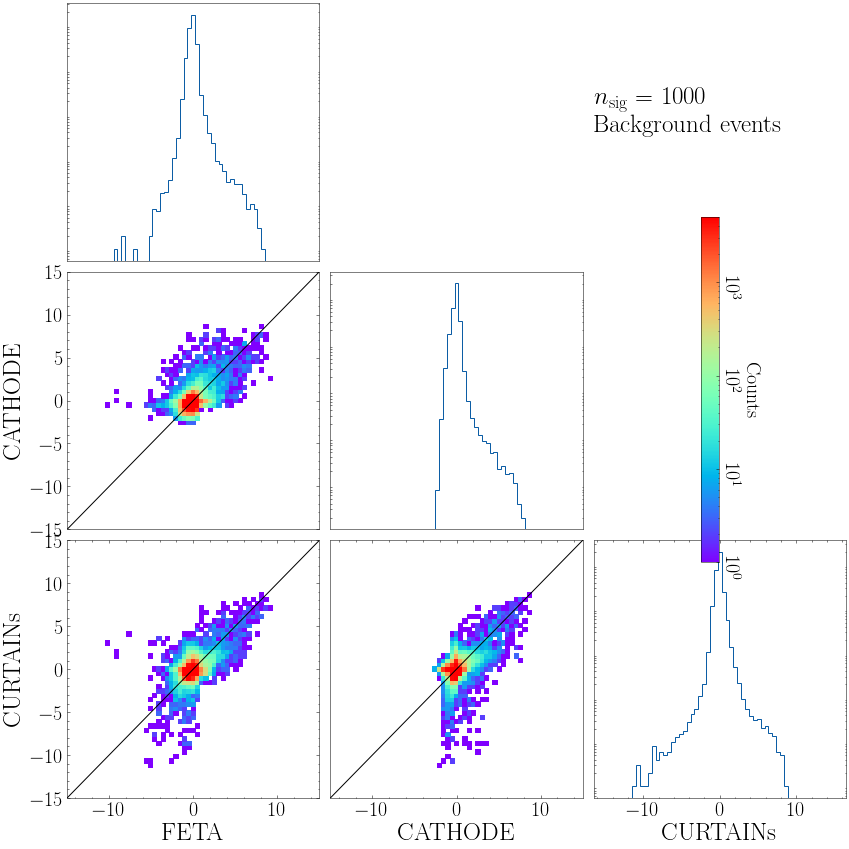

In [13]:
fig, ax = plt.subplots(dim, dim, figsize = (4*dim, 4*dim))

for dim_x in range(dim):
    for dim_y in range(dim):
        
        
        if dim_x < dim_y: # plot the 2d hist
            img_bkg = ax[dim_y, dim_x].hist2d(concatenated_results_bkg[synth_ids[dim_x]].flatten(), 
                                          concatenated_results_bkg[synth_ids[dim_y]].flatten(), 
                                          bins = b, norm=colors.LogNorm(vmin=1e0, vmax=vmax), cmap = cmap, 
                                          density = False)
            ax[dim_y, dim_x].plot([lower_plot_lim, upper_plot_lim], [lower_plot_lim, upper_plot_lim], color = "black")
            
        
        elif dim_x == dim_y: # plot the 1d hist
            ax[dim_x, dim_x].hist(concatenated_results_bkg[synth_ids[dim_x]].flatten(), bins = b, histtype = "step")
            ax[dim_x, dim_x].set_yscale("log")
            
        else:
            ax[dim_y, dim_x].set_axis_off()
            
        # axis labels
        if dim_y == dim - 1:
            ax[dim_y, dim_x].set_xlabel(nice_labels[dim_x], fontsize = fontsize)
            ax[dim_y, dim_x].tick_params(axis='x', which='major', labelsize=small_font)
        else:
            ax[dim_y, dim_x].set_xticks([])
        if (dim_x == 0) and (dim_y != 0):
            ax[dim_y, dim_x].set_ylabel(nice_labels[dim_y], fontsize = fontsize)
            ax[dim_y, dim_x].tick_params(axis='y', which='major', labelsize=small_font)
        else:
            ax[dim_y, dim_x].set_yticks([])
            
# label
ax[0, 2].text(0, .5, f"$n_\\mathrm{{sig}}$ = {num_signal_to_inject}\nBackground events", fontsize = fontsize)

# colorbar (they all have the same one)
cb_ax = fig.add_axes([.82,.34,.02,.4])
cbar = fig.colorbar(img_bkg[3],orientation='vertical',cax=cb_ax)

cbar.ax.tick_params(labelsize=small_font, rotation = 270) 
cbar.set_label("Counts", fontsize = small_font, rotation = 270, labelpad = 20)

        

            

plt.tight_layout()
fig.show()


#fig.savefig(f"paper_plots/corner_bkg_{num_signal_to_inject}.pdf", dpi = dpi)


## Signal

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


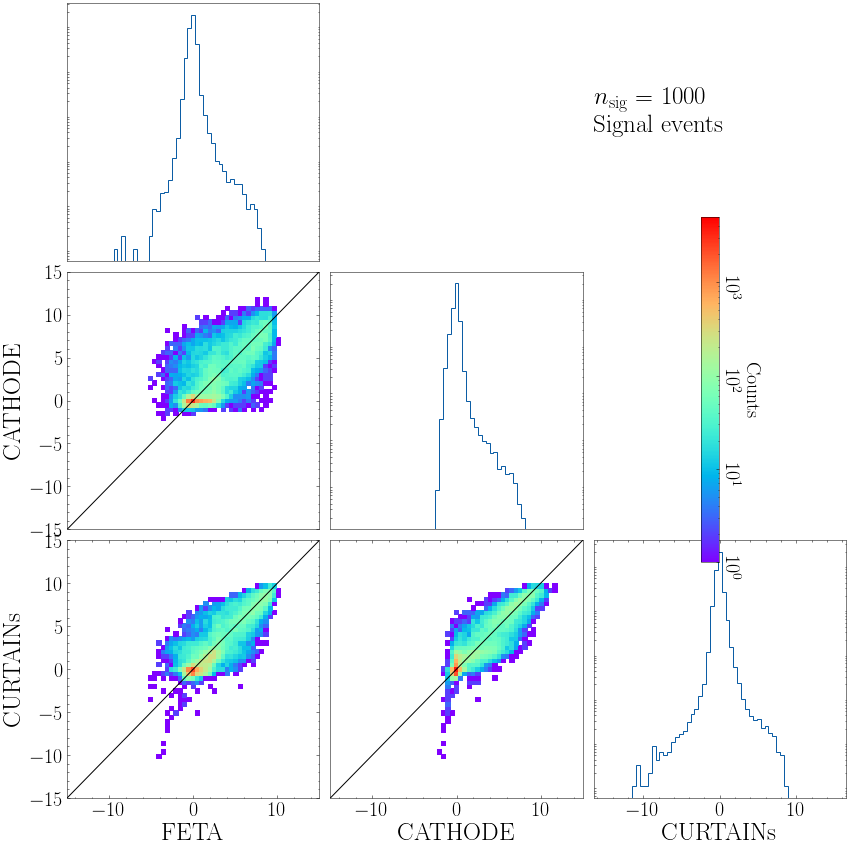

In [14]:



fig, ax = plt.subplots(dim, dim, figsize = (4*dim, 4*dim))



for dim_x in range(dim):
    for dim_y in range(dim):
        
        if dim_x < dim_y: # plot the 2d hist
            img_sig = ax[dim_y, dim_x].hist2d(concatenated_results_sig[synth_ids[dim_x]].flatten(), 
                                          concatenated_results_sig[synth_ids[dim_y]].flatten(), 
                                          bins = b, norm=colors.LogNorm(vmin=1e0, vmax=vmax), cmap = cmap, 
                                          density = False)
            ax[dim_y, dim_x].plot(b, b, color = "black")
            
        
        elif dim_x == dim_y: # plot the 1d hist
            ax[dim_x, dim_x].hist(concatenated_results_bkg[synth_ids[dim_x]].flatten(), bins = b, histtype = "step")
            ax[dim_x, dim_x].set_yscale("log")
            
        else:
            ax[dim_y, dim_x].set_axis_off()
            
        # axis labels
        if dim_y == dim - 1:
            ax[dim_y, dim_x].set_xlabel(nice_labels[dim_x], fontsize = fontsize)
            ax[dim_y, dim_x].tick_params(axis='x', which='major', labelsize=small_font)
        else:
            ax[dim_y, dim_x].set_xticks([])
        if (dim_x == 0) and (dim_y != 0):
            ax[dim_y, dim_x].set_ylabel(nice_labels[dim_y], fontsize = fontsize)
            ax[dim_y, dim_x].tick_params(axis='y', which='major', labelsize=small_font)
        else:
            ax[dim_y, dim_x].set_yticks([])
            
# label
ax[0, 2].text(0, .5, f"$n_\\mathrm{{sig}}$ = {num_signal_to_inject}\nSignal events", fontsize = fontsize)

# colorbar (they all have the same one)
cb_ax = fig.add_axes([.82,.34,.02,.4])
cbar = fig.colorbar(img_sig[3],orientation='vertical',cax=cb_ax)

cbar.ax.tick_params(labelsize=small_font, rotation = 270) 
cbar.set_label("Counts", fontsize = small_font, rotation = 270, labelpad = 20)



            

plt.tight_layout()
fig.show()

#fig.savefig(f"paper_plots/corner_sig_{num_signal_to_inject}.pdf", dpi = dpi)


## Plot one method's samples against each other for different random seeds

In [15]:

seed_1 = 1
seed_2 = 0



fig = make_plot(all_results_bkg["feta"][seed_1], all_results_bkg["feta"][seed_2], 
          all_results_sig["feta"][seed_1], all_results_sig["feta"][seed_2], 
          f"FETA seed {seed_1}", f"FETA seed {seed_2}")
#fig.savefig(f"paper_plots/feta_v_feta_{num_signal_to_inject}.pdf", dpi = dpi)


fig = make_plot(all_results_bkg["cathode"][seed_1], all_results_bkg["cathode"][seed_2], 
          all_results_sig["cathode"][seed_1], all_results_sig["cathode"][seed_2], 
          f"CATHODE seed {seed_1}", f"CATHODE seed {seed_2}")
#fig.savefig(f"paper_plots/cathode_v_cathode_{num_signal_to_inject}.pdf", dpi = dpi)


fig = make_plot(all_results_bkg["curtains"][seed_1], all_results_bkg["curtains"][seed_2], 
          all_results_sig["curtains"][seed_1], all_results_sig["curtains"][seed_2], 
          f"CURTAINs seed {seed_1}", f"CURTAINs seed {seed_2}")
#fig.savefig(f"paper_plots/curtains_v_curtains_{num_signal_to_inject}.pdf", dpi = dpi)
"""

fig = make_plot(all_results_bkg["salad"][seed_1], all_results_bkg["salad"][seed_2], 
          all_results_sig["salad"][seed_1], all_results_sig["salad"][seed_2], 
          f"SALAD seed {seed_1}", f"SALAD seed {seed_2}")
#fig.savefig(f"paper_plots/salad_v_salad_{num_signal_to_inject}.pdf", dpi = dpi)

"""



fig = make_plot(all_results_bkg["full_sup"][seed_1], all_results_bkg["full_sup"][seed_2], 
          all_results_sig["full_sup"][seed_1], all_results_sig["full_sup"][seed_2], 
          f"Full. Sup. seed {seed_1}", f"Full. Sup. seed {seed_2}")
fig.savefig(f"paper_plots/fullsup_v_fullsup{num_signal_to_inject}.pdf", dpi = dpi)




KeyError: 1